In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [196]:
#export
from exp.nb_07a import *

## Data block API foundations 

In [4]:
datasets.URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160'

## Image ItemList 

### Get images 

In [5]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160')

In [6]:
#export
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [7]:
path.ls()

[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val')]

In [8]:
(path/"val").ls()

[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03394916'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03417042'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03445777'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n02102040'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03425413'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03888257'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03028079'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n03000684'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n01440764'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n02979186')]

In [9]:
path_tench = path/"val"/"n01440764"

In [10]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00018317.JPEG')

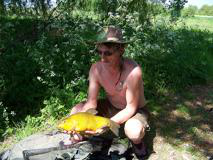

In [11]:
img = PIL.Image.open(img_fn)
img

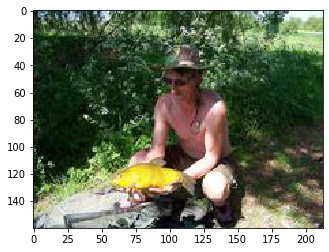

In [12]:
plt.imshow(img)

In [13]:
import numpy
imga = numpy.array(img)

In [14]:
imga.shape

(160, 213, 3)

In [15]:
imga[:10, :10, 0]

array([[ 13,  13,  23,  31, ...,  58,  63,  63,  59],
       [ 23,  17,   3,  28, ...,  52,  88,  59, 122],
       [ 25,   0,   7,  34, ..., 107,  72, 104, 135],
       [ 20,   8,  36,  41, ..., 191, 176, 110,  37],
       ...,
       [ 46,  38,  31,  30, ..., 140, 110,  48,  37],
       [ 66,  63,  21,  38, ..., 122, 141, 105,  15],
       [ 46,  56,  38,  22, ..., 105,  97, 108, 113],
       [ 40,  37,  22,   3, ..., 122, 168, 166, 153]], dtype=uint8)

In [17]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith("image/"))

In [23]:
" ".join(image_extensions)

'.jpeg .jpe .xwd .pbm .jpg .pnm .bmp .ras .xbm .tif .rgb .png .xpm .ppm .pgm .ico .gif .tiff .ief .svg'

In [26]:
#export
def setify(o): return o if isinstance(o, set) else set(listify(o))

In [31]:
test_eq(setify("aa"), {"aa"})
test_eq(setify(["aa", 1]), {"aa", 1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [43]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
           and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [44]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path, t, extensions=image_extensions)
t[:3]

[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/ILSVRC2012_val_00018317.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/ILSVRC2012_val_00037383.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/ILSVRC2012_val_00011233.JPEG')]

In [51]:
list(os.walk(path))[:3]

[('/Users/ricardofernandez/.fastai/data/imagenette-160', ['train', 'val'], []),
 ('/Users/ricardofernandez/.fastai/data/imagenette-160/train',
  ['n03394916',
   'n03417042',
   'n03445777',
   'n02102040',
   'n03425413',
   'n03888257',
   'n03028079',
   'n03000684',
   'n01440764',
   'n02979186'],
  []),
 ('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916',
  [],
  ['n03394916_58454.JPEG',
   'n03394916_32588.JPEG',
   'n03394916_32422.JPEG',
   'n03394916_33663.JPEG',
   'n03394916_27948.JPEG',
   'n03394916_38644.JPEG',
   'n03394916_35076.JPEG',
   'n03394916_38214.JPEG',
   'n03394916_23008.JPEG',
   'n03394916_33008.JPEG',
   'n03394916_7606.JPEG',
   'n03394916_35133.JPEG',
   'n03394916_28428.JPEG',
   'n03394916_53473.JPEG',
   'n03394916_28994.JPEG',
   'n03394916_69132.JPEG',
   'n03394916_33771.JPEG',
   'n03394916_44089.JPEG',
   'n03394916_29940.JPEG',
   'n03394916_11495.JPEG',
   'n03394916_40160.JPEG',
   'n03394916_29106.JPEG',
   'n03394916_207

In [61]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i, (p, d, f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filenames)
            if include is not None and i==0: d[:] = [o for o in d if o in include]
            else:                            d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [62]:
d = ["cat", ".bat", "sleep"]
d[:] = [o for o in d if not o.startswith(".")]
d

['cat', 'sleep']

In [63]:
list(os.scandir(path))[0].name

'train'

In [64]:
get_files(path_tench, image_extensions)[:3]

[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00018317.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00037383.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/val/n01440764/ILSVRC2012_val_00011233.JPEG')]

In [65]:
get_files(path, image_extensions, recurse=True)[:3]

[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'),
 PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG')]

In [66]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [68]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

64.1 ms ± 1.69 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prepare for modeling 

### Get files 

In [93]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path=".", tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms
        
    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls=self.__class__
        return cls(items, self.path, tfms=self.tfms)
    
    def get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res, list): return [self._get(o) for o in res]
        return self._get(res)
    
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [94]:
#export
class Transform(): _order=0
    
class MakeRGB(Transform):
    def __call__(self, item): return item.convert("RGB")
    
def make_rgb(item): return item.convert("RGB")

In [95]:
il = ImageList.from_files(path, tfms=make_rgb)

In [96]:
il

ImageList (13394 items)
[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/

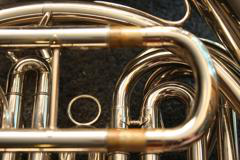

In [97]:
img = il[0]; img

In [98]:
il[:1]

[<PIL.Image.Image image mode=RGB size=240x160 at 0x1A2406F3D0>]

### Split validation set 

In [100]:
fn = il.items[0]; fn

PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG')

In [101]:
fn.parent

PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916')

In [102]:
fn.parent.parent

PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train')

In [103]:
fn.parent.parent.name

'train'

In [104]:
#export
def grandparent_splitter(fn, valid_name="valid", train_name="train"):
    gp = fn.parent.parent.name
    return True if gp == valid_name else False if gp==train_name else None

def split_by_func(items, f):
    mask = [f(o) for o in items]
    # None values will be filtered out
    f = [o for o,m in zip(items, mask) if m==False]
    t = [o for o,m in zip(items, mask) if m==True ]
    return f, t

In [105]:
splitter = partial(grandparent_splitter, valid_name="val")

In [107]:
%time train, valid =  split_by_func(il, splitter)

CPU times: user 40 ms, sys: 1.98 ms, total: 42 ms
Wall time: 41.2 ms


In [108]:
len(train), len(valid)

(12894, 500)

In [121]:
#export
class SplitData:
    def __init__(self, train, valid): self.train, self.valid = train, valid
        
    def __getattr__(self, k): return getattr(self.train, k)
    
    def __setstate__(self, data:Any): self.__dict__.update(data)
        
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)
    
    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [122]:
len(split_by_func(il.items, splitter))

2

In [123]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (12894 items)
[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/Users/ricardofernan

In [128]:
len(sd.train.items), len(sd.valid.items)

(12894, 500)

In [131]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

In [142]:
#export
class Processor:
    def process(self, items): return items
    
class CategoryProcessor(Processor):
    def __init__(self): self.vocab = None
        
    def __call__(self, items):
        # The vocab is defined on the first use
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    
    def proc1(self, item): return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    
    def deproc1(self, idx): return self.vocab[idx]

In [146]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(ds, f, cls=ItemList): return cls([f(o) for o in ds.items], path=ds.path)

class LabeledData:
    def process(self, il, proc): return il.new(compose(il.items, proc))
    
    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x, self.y = self.process(x, proc_x), self.process(y, proc_y)
        self.proc_x, self.proc_y = proc_x, proc_y
        
    def __repr__(self): return f"{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n"
    def __getitem__(self, idx): return self.x[idx], self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx, int) or (isinstance(idx, torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item
    
    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)
    
def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train, valid)

In [147]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [148]:
assert ll.train.proc_y is ll.valid.proc_y

In [150]:
ll.train.y

ItemList (12894 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /Users/ricardofernandez/.fastai/data/imagenette-160

In [151]:
ll.train.y.items[0], ll.train.y_obj(0), ll.train.y_obj(slice(2))

(0, 'n03394916', ['n03394916', 'n03394916'])

In [152]:
ll

SplitData
Train: LabeledData
x: ImageList (12894 items)
[PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_58454.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32588.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_32422.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_33663.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_27948.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38644.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_35076.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_38214.JPEG'), PosixPath('/Users/ricardofernandez/.fastai/data/imagenette-160/train/n03394916/n03394916_23008.JPEG'), PosixPath('/User

## Transform to tensor 

In [153]:
ll.train[0]

(<PIL.Image.Image image mode=RGB size=240x160 at 0x1A258AB490>, 0)

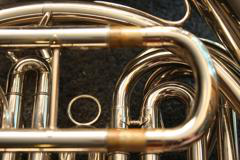

In [154]:
ll.train[0][0]

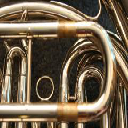

In [155]:
ll.train[0][0].resize((128,128))

In [156]:
#export
class ResizeFixed(Transform):
    _order=10
    def __init__(self, size):
        if isinstance(size, int): size=(size, size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)
    
def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h, w, -1).permute(2, 0, 1)
to_byte_tensor._order=20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order=30

In [157]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [159]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis("off")
    plt.imshow(im.permute(1,2,0))

In [161]:
x, y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

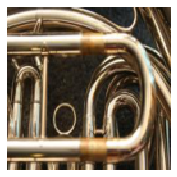

In [162]:
show_image(x)

In [168]:
x.shape, x.dtype, y

(torch.Size([3, 128, 128]), torch.float32, 0)

## Modeling 

### DataBunch 

In [169]:
bs=32

In [170]:
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs, num_workers=4)

In [171]:
x, y = next(iter(train_dl))

In [172]:
x.shape

torch.Size([32, 3, 128, 128])

'n03888257'

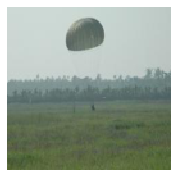

In [174]:
show_image(x[0])
ll.train.proc_y.vocab[y[0]]

In [175]:
y

tensor([5, 4, 1, 1, 6, 8, 2, 7, 1, 8, 5, 9, 2, 2, 9, 2, 1, 1, 6, 4, 2, 1, 4, 8,
        6, 3, 0, 6, 3, 7, 7, 9])

In [176]:
#export
class DataBunch:
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl, self.valid_dl, self.c_in, self.c_out = train_dl, valid_dl, c_in, c_out
        
    @property
    def train_ds(self): return self.train_dl.dataset
    
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [177]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [180]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
tfms = [make_rgb, ResizeFixed(64), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name="val"))
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())
data = ll.to_databunch(bs, c_in=3, c_out=10, num_workers=4)

## Model 

In [182]:
cbfs = [partial(AvgStatsCallback, accuracy), CudaCallback]

In [184]:
m, s = x.mean((0,2,3)) , x.std((0,2,3))
m, s

(tensor([0.4635, 0.4461, 0.4175]), tensor([0.2776, 0.2709, 0.2969]))

In [188]:
#export
def normalize_chan(x, mean, std):
    return (x-mean[...,None, None]) / std[...,None,None]

_m = tensor([0.47, 0.48, 0.45])
_s = tensor([0.29, 0.28, 0.30])
norm_imagenette = partial(normalize_chan, mean=_m, std=_s)

In [191]:
_m[..., None, None]

tensor([[[0.4700]],

        [[0.4800]],

        [[0.4500]]])

In [192]:
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [193]:
nfs = [64, 64, 128, 256]

In [200]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers = [f(l1  , l1  , stride=1),
              f(l2  , l2*2, stride=2),
              f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten),
               nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [201]:
def cos_1cycle_anneal(start, high, end):
    return [sched_cos(start, high),  sched_cos(high, end)]

In [202]:
sched = combine_scheds([0.3, 0.7], cos_1cycle_anneal(0.1, 0.3, 0.05))

In [203]:
learn, run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs+[partial(ParamScheduler,"lr", sched)])

In [205]:
def model_summary(run, learn, data, find_all=False):
    xb, yb = get_batch(data.valid_dl, run)
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook, mod, inp, out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [207]:
model_summary(run, learn, data)

AttributeError: 'Runner' object has no attribute 'in_train'

In [209]:
dir(learn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'loss_func',
 'model',
 'opt']